In [3]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
!apt-get update -qq
!apt-get install fonts-nanum* -qq
import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings(action='ignore')
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf' # 나눔 고딕
font_name = fm.FontProperties(fname=path, size=10).get_name() # 기본 폰트 사이즈 : 10

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (42.7 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121658 files and direc

In [22]:
import pandas as pd

df = pd.read_csv('/content/sample_data/card.csv', encoding='euc-kr')

# 데이터 확인
print(df.head())

       연월         업종명 이용자구분    성별  이용자수  이용건수       이용금액
0  201801  건강보조식품 소매업  기타외국  알수없음    65    78  101523250
1  201801  건강보조식품 소매업   내국인    남성   159   165   25558470
2  201801  건강보조식품 소매업   내국인  알수없음     1     1     396000
3  201801  건강보조식품 소매업   내국인    여성   200   218   32041740
4  201801  건강보조식품 소매업   동남아  알수없음     8     8    1550000


In [23]:
df

,연월,업종명,이용자구분,성별,이용자수,이용건수,이용금액
0,201801,건강보조식품 소매업,기타외국,알수없음,65,78,101523250
1,201801,건강보조식품 소매업,내국인,남성,159,165,25558470
2,201801,건강보조식품 소매업,내국인,알수없음,1,1,396000
3,201801,건강보조식품 소매업,내국인,여성,200,218,32041740
4,201801,건강보조식품 소매업,동남아,알수없음,8,8,1550000
...,...,...,...,...,...,...,...
20639,202310,휴양콘도 운영업,법인,알수없음,2084,4413,2208853529
20640,202310,휴양콘도 운영업,제주도민,남성,897,1118,64997332
20641,202310,휴양콘도 운영업,제주도민,알수없음,1,1,4000
20642,202310,휴양콘도 운영업,제주도민,여성,967,1169,86172869


In [24]:
df['연월'] = pd.to_datetime(df['연월'], format='%Y%m')

# 월별 이용금액 합계 계산
monthly_sum = df.groupby(df['연월'].dt.to_period("M"))['이용금액'].sum()

# 결과 출력
print(monthly_sum)

연월
2018-01    154220268710
2018-02    145254284752
2018-03    157899376930
2018-04    169325413360
2018-05    177381020615
               ...     
2023-06    165290700486
2023-07    161731013078
2023-08    177449863504
2023-09    168550932947
2023-10    176256974597
Freq: M, Name: 이용금액, Length: 70, dtype: int64


In [25]:
monthly_sum_df = monthly_sum.reset_index()

# 결과 출력
print(monthly_sum_df)

         연월          이용금액
0   2018-01  154220268710
1   2018-02  145254284752
2   2018-03  157899376930
3   2018-04  169325413360
4   2018-05  177381020615
..      ...           ...
65  2023-06  165290700486
66  2023-07  161731013078
67  2023-08  177449863504
68  2023-09  168550932947
69  2023-10  176256974597

[70 rows x 2 columns]


In [5]:
monthly_sum_df

,연월,이용금액
0,2018-01,154220268710
1,2018-02,145254284752
2,2018-03,157899376930
3,2018-04,169325413360
4,2018-05,177381020615
...,...,...
65,2023-06,165290700486
66,2023-07,161731013078
67,2023-08,177449863504
68,2023-09,168550932947


In [6]:
monthly_sum_df['amount'] = monthly_sum_df['이용금액']

In [7]:
monthly_sum_df = monthly_sum_df.drop(columns=['이용금액'])

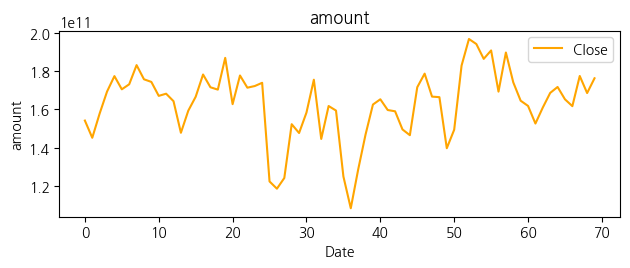

In [8]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"  # NanumGothic 폰트 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

plt.subplot(2, 1, 1)
plt.plot(monthly_sum_df.index, monthly_sum_df['amount'], label='Close', color='orange')
plt.title('amount')
plt.xlabel('Date')
plt.ylabel('amount')
plt.legend()

plt.tight_layout()
plt.show()

In [9]:
monthly_sum_df

,연월,amount
0,2018-01,154220268710
1,2018-02,145254284752
2,2018-03,157899376930
3,2018-04,169325413360
4,2018-05,177381020615
...,...,...
65,2023-06,165290700486
66,2023-07,161731013078
67,2023-08,177449863504
68,2023-09,168550932947


<ipython-input-10-1af616548cd9>:12: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  monthly_sum_df = monthly_sum_df.fillna(monthly_sum_df.mean())


Epoch 1/50
2/2 [==============================] - 3s 321ms/step - loss: 0.4297 - val_loss: 0.4427
Epoch 2/50
2/2 [==============================] - 0s 45ms/step - loss: 0.4006 - val_loss: 0.4087
Epoch 3/50
2/2 [==============================] - 0s 34ms/step - loss: 0.3745 - val_loss: 0.3776
Epoch 4/50
2/2 [==============================] - 0s 34ms/step - loss: 0.3499 - val_loss: 0.3501
Epoch 5/50
2/2 [==============================] - 0s 34ms/step - loss: 0.3265 - val_loss: 0.3246
Epoch 6/50
2/2 [==============================] - 0s 35ms/step - loss: 0.3056 - val_loss: 0.2997
Epoch 7/50
2/2 [==============================] - 0s 35ms/step - loss: 0.2856 - val_loss: 0.2749
Epoch 8/50
2/2 [==============================] - 0s 34ms/step - loss: 0.2654 - val_loss: 0.2498
Epoch 9/50
2/2 [==============================] - 0s 34ms/step - loss: 0.2450 - val_loss: 0.2241
Epoch 10/50
2/2 [==============================] - 0s 34ms/step - loss: 0.2238 - val_loss: 0.1980
Epoch 11/50
2/2 [===========

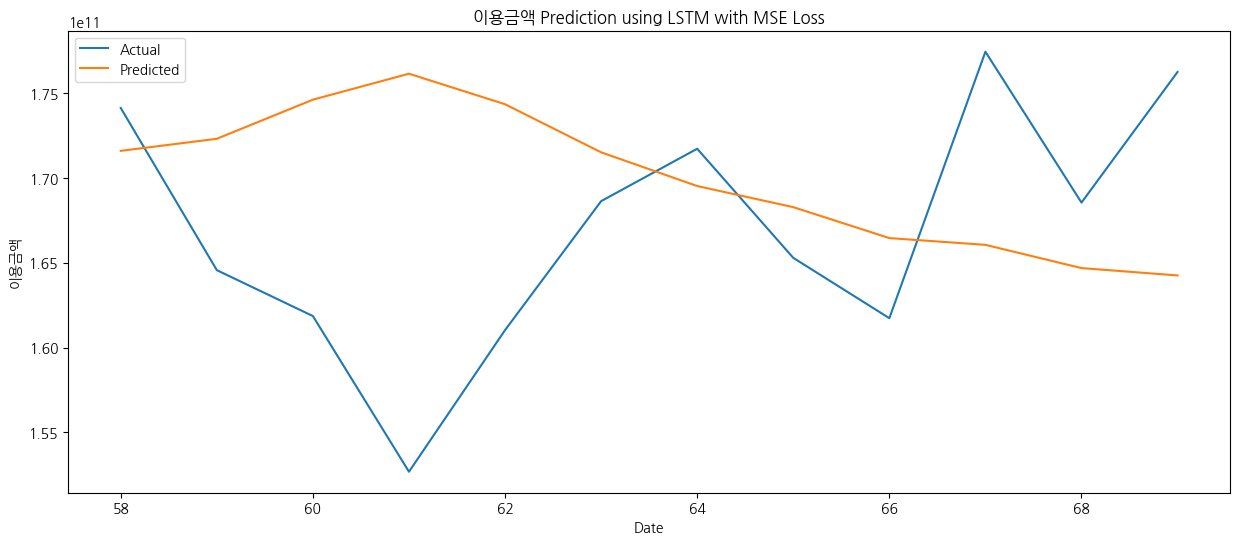

In [10]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping

# amount 열을 타겟으로 설정
target_col = 'amount'

# NaN 값 채우기 (예제에서는 평균값 사용)
monthly_sum_df = monthly_sum_df.fillna(monthly_sum_df.mean())

# 데이터 정규화 (MinMaxScaler 사용)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(monthly_sum_df[[target_col]])

# 시퀀스 데이터 생성
sequence_length = 10

sequences = []
target = []

for i in range(len(scaled_data) - sequence_length):
    seq = scaled_data[i:i + sequence_length, 0]
    label = scaled_data[i + sequence_length, 0]
    sequences.append(seq)
    target.append(label)

X = np.array(sequences)
y = np.array(target)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# LSTM 모델 생성
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))

# 모델 컴파일 (Mean Squared Error를 손실 함수로 사용)
model.compile(optimizer='adam', loss='mse')  # MSE 사용 (회귀 문제)

# 조기 종료 콜백 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# 모델 학습
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# 모델 평가
loss = model.evaluate(X_test, y_test)
print(f'Mean Squared Error: {loss}')

# 예측 수행
predictions = model.predict(X_test)

# 정규화된 예측값을 역정규화
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# 예측 결과 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.plot(monthly_sum_df.index[-len(predictions):], y_test_actual, label='Actual')
plt.plot(monthly_sum_df.index[-len(predictions):], predictions, label='Predicted')
plt.title('이용금액 Prediction using LSTM with MSE Loss')
plt.xlabel('Date')
plt.ylabel('이용금액')
plt.legend()
plt.show()


Epoch 1/50


<ipython-input-11-9312ebaf9153>:12: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  monthly_sum_df = monthly_sum_df.fillna(monthly_sum_df.mean())


2/2 [==============================] - 1s 259ms/step - loss: 0.3763 - val_loss: 0.3312
Epoch 2/50
2/2 [==============================] - 0s 33ms/step - loss: 0.3116 - val_loss: 0.2524
Epoch 3/50
2/2 [==============================] - 0s 32ms/step - loss: 0.2500 - val_loss: 0.1802
Epoch 4/50
2/2 [==============================] - 0s 32ms/step - loss: 0.1885 - val_loss: 0.1130
Epoch 5/50
2/2 [==============================] - 0s 33ms/step - loss: 0.1328 - val_loss: 0.0532
Epoch 6/50
2/2 [==============================] - 0s 36ms/step - loss: 0.0884 - val_loss: 0.0161
Epoch 7/50
2/2 [==============================] - 0s 31ms/step - loss: 0.0570 - val_loss: 0.0231
Epoch 8/50
2/2 [==============================] - 0s 32ms/step - loss: 0.0580 - val_loss: 0.0597
Epoch 9/50
2/2 [==============================] - 0s 34ms/step - loss: 0.0739 - val_loss: 0.0657
Epoch 10/50
2/2 [==============================] - 0s 34ms/step - loss: 0.0753 - val_loss: 0.0454
Epoch 11/50
1/1 [======================

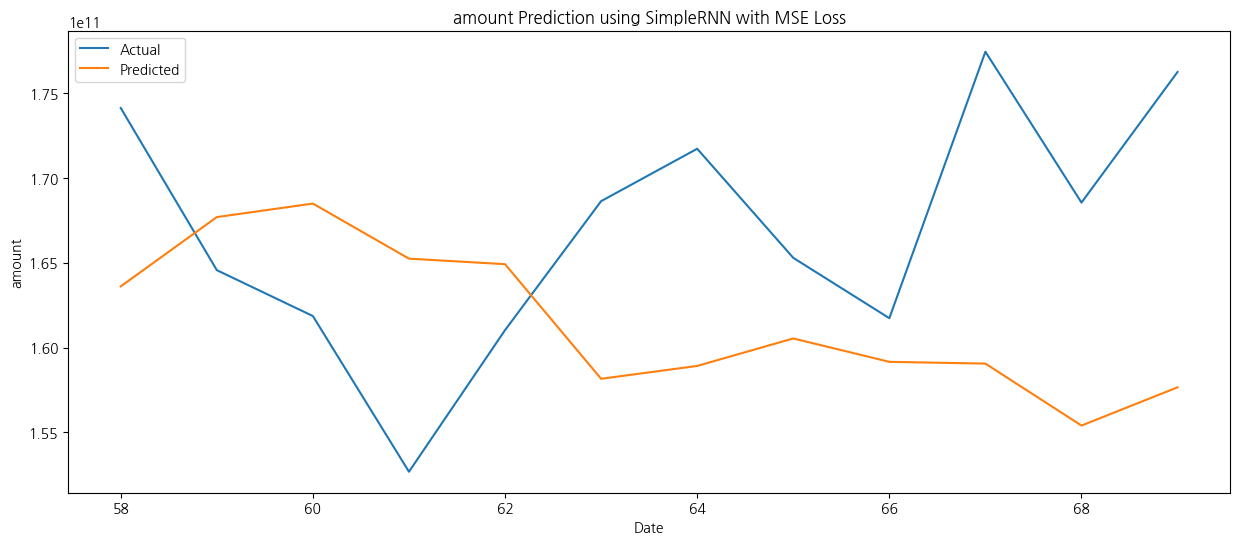

In [11]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from keras.callbacks import EarlyStopping

# amount 열을 타겟으로 설정
target_col = 'amount'

# NaN 값 채우기 (예제에서는 평균값 사용)
monthly_sum_df = monthly_sum_df.fillna(monthly_sum_df.mean())

# 데이터 정규화 (MinMaxScaler 사용)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(monthly_sum_df[[target_col]])

# 시퀀스 데이터 생성
sequence_length = 10

sequences = []
target = []

for i in range(len(scaled_data) - sequence_length):
    seq = scaled_data[i:i + sequence_length, 0]
    label = scaled_data[i + sequence_length, 0]
    sequences.append(seq)
    target.append(label)

X = np.array(sequences)
y = np.array(target)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# SimpleRNN 모델 생성
model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))

# 모델 컴파일 (Mean Squared Error를 손실 함수로 사용)
model.compile(optimizer='adam', loss='mse')  # MSE 사용 (회귀 문제)

# 조기 종료 콜백 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# 모델 학습
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# 모델 평가
loss = model.evaluate(X_test, y_test)
print(f'Mean Squared Error: {loss}')

# 예측 수행
predictions = model.predict(X_test)

# 정규화된 예측값을 역정규화
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# 예측 결과 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.plot(monthly_sum_df.index[-len(predictions):], y_test_actual, label='Actual')
plt.plot(monthly_sum_df.index[-len(predictions):], predictions, label='Predicted')
plt.title('amount Prediction using SimpleRNN with MSE Loss')
plt.xlabel('Date')
plt.ylabel('amount')
plt.legend()
plt.show()


In [20]:
import pandas as pd

dfr = pd.read_csv('/content/sample_data/raintemp.csv', encoding='euc-kr')

# 데이터 확인
print(dfr.head())

  강수량(mm)  평균기온(℃)  Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5  \
0    63.7      5.9         NaN         NaN         NaN         NaN   
1    10.5      6.3         NaN         NaN         NaN         NaN   
2   151.6     11.8         NaN         NaN         NaN         NaN   
3     312     15.8         NaN         NaN         NaN         NaN   
4   356.1     18.7         NaN         NaN         NaN         NaN   

   Unnamed: 6  Unnamed: 7  
0         NaN         NaN  
1         NaN         NaN  
2         NaN         NaN  
3         NaN         NaN  
4         NaN         NaN  


In [21]:
selected_columns = dfr.iloc[:, [0, 1]]

In [29]:
merged_df = pd.merge(monthly_sum_df, selected_columns, left_index=True, right_index=True)
merged_df

,연월,이용금액,강수량(mm),평균기온(℃)
0,2018-01,154220268710,63.7,5.9
1,2018-02,145254284752,10.5,6.3
2,2018-03,157899376930,151.6,11.8
3,2018-04,169325413360,312,15.8
4,2018-05,177381020615,356.1,18.7
...,...,...,...,...
65,2023-06,165290700486,418.5,22.6
66,2023-07,161731013078,378.8,26.2
67,2023-08,177449863504,218.9,28.0
68,2023-09,168550932947,126.4,25.8


In [30]:
merged_df.columns = ['Date', 'amount', 'rain', 'temp']

In [32]:
df = merged_df

In [36]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Input, LSTM, Dense, concatenate
from keras.models import Model
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 전처리
scaler_close = MinMaxScaler()
scaler_volume = MinMaxScaler()
scaler_ma10 = MinMaxScaler()
scaler_bandwidth = MinMaxScaler()

scaled_close = scaler_close.fit_transform(df[['amount']])
scaled_volume = scaler_volume.fit_transform(df[['rain']])
scaled_ma10 = scaler_ma10.fit_transform(df[['temp']])

# 데이터 전처리 함수
def preprocess_data(data, timesteps):
    X, y = [], []

    for i in range(len(data) - timesteps):
        X.append(data[i:i + timesteps, 0])
        y.append(data[i + timesteps, 0])

    return np.array(X), np.array(y)

# 시계열 데이터의 타임 스텝 수
timesteps = 10

# Close 데이터 전처리
X_close, y_close = preprocess_data(scaled_close, timesteps)

# Volume 데이터 전처리
X_volume, y_volume = preprocess_data(scaled_volume, timesteps)

# MA10 데이터 전처리
X_ma10, y_ma10 = preprocess_data(scaled_ma10, timesteps)


# 데이터 분할
X_close_train, X_close_test, y_close_train, y_close_test = train_test_split(X_close, y_close, test_size=0.05, shuffle=False)
X_volume_train, X_volume_test, y_volume_train, y_volume_test = train_test_split(X_volume, y_volume, test_size=0.05, shuffle=False)
X_ma10_train, X_ma10_test, y_ma10_train, y_ma10_test = train_test_split(X_ma10, y_ma10, test_size=0.05, shuffle=False)

# 모델 정의
input_close = Input(shape=(timesteps, 1))
lstm_close = LSTM(50)(input_close)

input_volume = Input(shape=(timesteps, 1))
lstm_volume = LSTM(50)(input_volume)

input_ma10 = Input(shape=(timesteps, 1))
lstm_ma10 = LSTM(50)(input_ma10)

input_bandwidth = Input(shape=(timesteps, 1))
lstm_bandwidth = LSTM(50)(input_bandwidth)

merged = concatenate([lstm_close, lstm_volume, lstm_ma10, lstm_bandwidth])
output = Dense(1)(merged)

model = Model(inputs=[input_close, input_volume, input_ma10, input_bandwidth], outputs=output)
model.compile(optimizer='adam', loss='mse')  # MSE 사용 (회귀 문제)

# 조기 종료 콜백 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# 모델 학습
history = model.fit([X_close_train, X_volume_train, X_ma10_train], y_close_train,
                    epochs=50, batch_size=32,
                    validation_data=([X_close_test, X_volume_test, X_ma10_test], y_close_test),
                    callbacks=[early_stopping])

# 모델 평가
loss = model.evaluate([X_close_test, X_volume_test, X_ma10_test], y_close_test)
print(f'Mean Squared Error: {loss}')

# 예측 수행
predictions = model.predict([X_close_test, X_volume_test, X_ma10_test])

# 정규화된 예측값을 역정규화
predictions = scaler_close.inverse_transform(predictions.reshape(-1, 1))
y_close_test_actual = scaler_close.inverse_transform(y_close_test.reshape(-1, 1))

# 예측 결과 시각화
plt.figure(figsize=(15, 6))
plt.plot(df.index[-len(predictions):], y_close_test_actual, label='Actual Close')
plt.plot(df.index[-len(predictions):], predictions, label='Predicted Close')
plt.title('Close Price Prediction using LSTM with MSE Loss')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

Epoch 1/50


ValueError: ignored

Epoch 1/50
2/2 [==============================] - 11s 4s/step - loss: 0.4840 - val_loss: 0.4135
Epoch 2/50
2/2 [==============================] - 0s 209ms/step - loss: 0.3628 - val_loss: 0.2916
Epoch 3/50
2/2 [==============================] - 0s 172ms/step - loss: 0.2651 - val_loss: 0.1912
Epoch 4/50
2/2 [==============================] - 0s 178ms/step - loss: 0.1873 - val_loss: 0.1119
Epoch 5/50
2/2 [==============================] - 0s 239ms/step - loss: 0.1270 - val_loss: 0.0547
Epoch 6/50
2/2 [==============================] - 0s 87ms/step - loss: 0.0805 - val_loss: 0.0206
Epoch 7/50
2/2 [==============================] - 0s 210ms/step - loss: 0.0633 - val_loss: 0.0096
Epoch 8/50
2/2 [==============================] - 0s 198ms/step - loss: 0.0600 - val_loss: 0.0163
Epoch 9/50
2/2 [==============================] - 0s 132ms/step - loss: 0.0731 - val_loss: 0.0257
Epoch 10/50
2/2 [==============================] - 0s 117ms/step - loss: 0.0797 - val_loss: 0.0260
Epoch 11/50
2/2 [=====

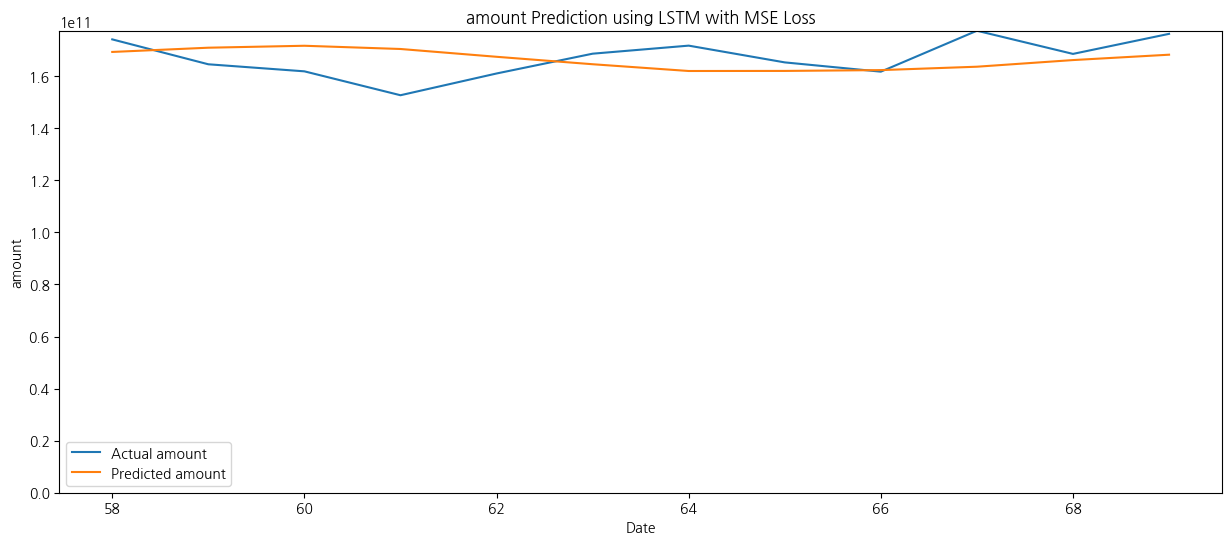

In [40]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Input, LSTM, Dense, concatenate
from keras.models import Model
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# 데이터 전처리
scaler_amount = MinMaxScaler()
scaler_rain = MinMaxScaler()
scaler_temp = MinMaxScaler()

scaled_amount = scaler_amount.fit_transform(df[['amount']])
scaled_rain = scaler_rain.fit_transform(df[['rain']])
scaled_temp = scaler_temp.fit_transform(df[['temp']])

# 데이터 전처리 함수
def preprocess_data(data, timesteps):
    X, y = [], []

    for i in range(len(data) - timesteps):
        X.append(data[i:i + timesteps, 0])
        y.append(data[i + timesteps, 0])

    return np.array(X), np.array(y)

# 시계열 데이터의 타임 스텝 수
timesteps = 10

# amount 데이터 전처리
X_amount, y_amount = preprocess_data(scaled_amount, timesteps)

# rain 데이터 전처리
X_rain, y_rain = preprocess_data(scaled_rain, timesteps)

# temp 데이터 전처리
X_temp, y_temp = preprocess_data(scaled_temp, timesteps)

# 데이터 분할
X_amount_train, X_amount_test, y_amount_train, y_amount_test = train_test_split(X_amount, y_amount, test_size=0.2, shuffle=False)
X_rain_train, X_rain_test, y_rain_train, y_rain_test = train_test_split(X_rain, y_rain, test_size=0.2, shuffle=False)
X_temp_train, X_temp_test, y_temp_train, y_temp_test = train_test_split(X_temp, y_temp, test_size=0.2, shuffle=False)

# 모델 정의
input_amount = Input(shape=(timesteps, 1))
lstm_amount = LSTM(50)(input_amount)

input_rain = Input(shape=(timesteps, 1))
lstm_rain = LSTM(50)(input_rain)

input_temp = Input(shape=(timesteps, 1))
lstm_temp = LSTM(50)(input_temp)

merged = concatenate([lstm_amount, lstm_rain, lstm_temp])
output = Dense(1)(merged)

model = Model(inputs=[input_amount, input_rain, input_temp], outputs=output)
model.compile(optimizer='adam', loss='mse')  # MSE 사용 (회귀 문제)

# 조기 종료 콜백 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# 모델 학습
history = model.fit([X_amount_train, X_rain_train, X_temp_train], y_amount_train,
                    epochs=50, batch_size=32,
                    validation_data=([X_amount_test, X_rain_test, X_temp_test], y_amount_test),
                    callbacks=[early_stopping])

# 모델 평가
loss = model.evaluate([X_amount_test, X_rain_test, X_temp_test], y_amount_test)
print(f'Mean Squared Error: {loss}')

# 예측 수행
predictions = model.predict([X_amount_test, X_rain_test, X_temp_test])

# 정규화된 예측값을 역정규화
predictions = scaler_amount.inverse_transform(predictions.reshape(-1, 1))
y_amount_test_actual = scaler_amount.inverse_transform(y_amount_test.reshape(-1, 1))

# 예측 결과 시각화
plt.figure(figsize=(15, 6))
plt.plot(df.index[-len(predictions):], y_amount_test_actual, label='Actual amount')
plt.plot(df.index[-len(predictions):], predictions, label='Predicted amount')
plt.title('amount Prediction using LSTM with MSE Loss')
plt.xlabel('Date')
plt.ylabel('amount')
plt.legend()
plt.ylim(bottom=0, top=max(y_amount_test_actual.max(), predictions.max()) + 5000000)

plt.show()


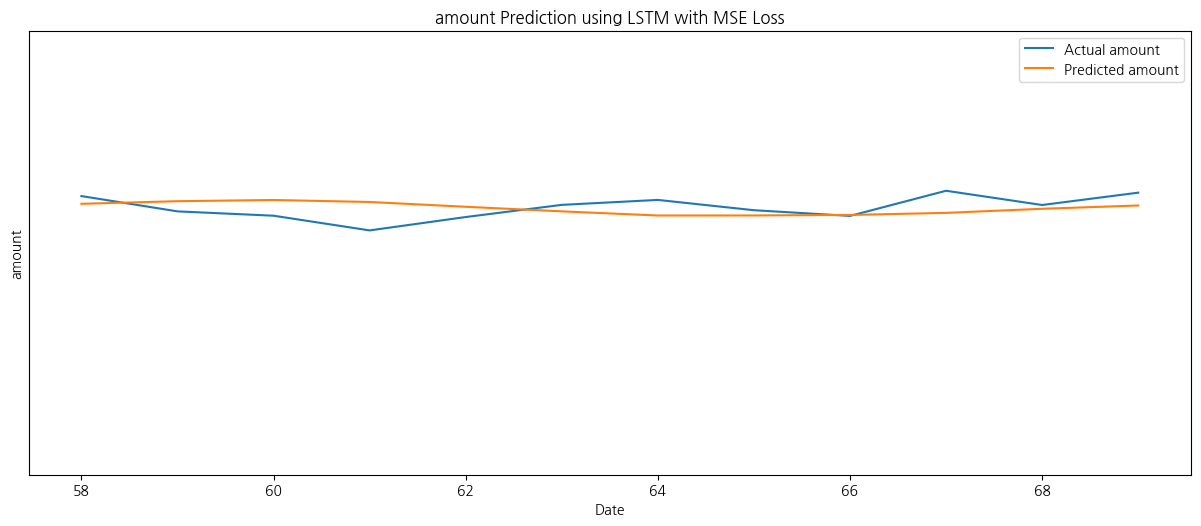

In [47]:

# 예측 결과 시각화
plt.figure(figsize=(15, 6))
plt.plot(df.index[-len(predictions):], y_amount_test_actual, label='Actual amount')
plt.plot(df.index[-len(predictions):], predictions, label='Predicted amount')
plt.title('amount Prediction using LSTM with MSE Loss')
plt.xlabel('Date')
plt.ylabel('amount')
plt.legend()

# y 축 범위 설정
y_max = max(y_amount_test_actual.max(), predictions.max()) + 5000000
plt.ylim(bottom=0, top=y_max+100000000000)

# y 축 눈금 지우기
plt.yticks([])

# 그림의 여백 조절
plt.subplots_adjust(top=0.85)

plt.show()

plt.show()
